## LDA Topic Modeling with Tweets

In [1]:
import GetOldTweets3 as got

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

import re

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 100)
pd.options.display.max_colwidth = 150

#### Retrieving Data from Twitter API via GetOldTweets3

In [4]:
tweetCriteria = got.manager.TweetCriteria().setQuery('anxiety')\
                                           .setSince("2019-06-09")\
                                           .setUntil("2020-06-09")\
                                           .setNear('New York')\
                                           .setMaxTweets(10000)
                                           

tweet_object = got.manager.TweetManager.getTweets(tweetCriteria)

In [5]:
len(tweet_object)

10000

In [6]:
#construct a dictionary of desired values

tweet_dict = list(map(lambda x: {'text': x.text, 'user': x.username,
                                 'date': x.date, 'retweet': x.retweets,
                                 'mention': x.mentions, 'hashtags': x.hashtags,
                                 'location' : x.geo}, tweet_object))


In [34]:
#turn dictionary into dataframe 

df = pd.DataFrame(tweet_dict)

In [32]:
#preview dataframe


print(df.shape)
df.head(3)

(10000, 8)


,Unnamed: 0,text,user,date,retweet,mention,hashtags,location
0,0,Whatever it takes.,Sharkus72,2020-06-08 23:59:59+00:00,0,NaN,NaN,NaN
1,1,Как именно поход делает её законным? Все говорят но никто не может объяснить логику. При этом все предыдущие авторы не стали менее законными при я...,andrey_sitnik,2020-06-08 23:59:59+00:00,0,NaN,NaN,NaN
2,2,NaN,Blackdiam0ndX,2020-06-08 23:59:59+00:00,0,NaN,NaN,NaN


In [121]:
#write tweets to csv 
df.to_csv('tweets.csv', index = False)

### Cleaning and analyzing text data 

In [3]:
df = pd.read_csv('tweets.csv')

In [4]:
df.head()

,text
0,Whatever it takes.
1,Как именно поход делает её законным? Все говорят но никто не может объяснить логику. При этом все предыдущие авторы не стали менее законными при я...
2,NaN
3,Love Spirals Downwards - Idylls - Stir About the Stars
4,Giving Away the House? Las Vegas Resorts Reopen With Rock-Bottom Rates


In [12]:

# regex = re.compile('[^a-zA-Z]')

In [5]:
def remove_urls(df):
    df['text'] = df['text'].str.replace(r"http\S+", "")

remove_urls(df)

In [127]:
http = df['text'].str.contains(r'http\S+', regex = True)

In [7]:
df['text'].dropna(inplace = True)

In [8]:
#creating list of stop words to be removed from body of tweet texts.
tokenizer = RegexpTokenizer(r'(?u)(?<![@])#?\b\w\w+\b')


#create stopword list from nltk.corpus stopwords to remove common words of no contextual significance
sw_list = stopwords.words('english')


sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            '-', '–', '—', 'co', 'û_','ûï', 'amp', 'get', 'new', 'one', 'go', 'rt', 'gt','got', 'u']
sw_set = set(sw_list)

In [9]:
len(sw_list)

205

In [10]:
len(sw_set)

203

In [133]:
#observing stop word set
sw_set

{'""',
 "''",
 '-',
 '...',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'co',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'get',
 'go',
 'got',
 'gt',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once

In [11]:
def process_text(text):
    tokens = tokenizer.tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [13]:
df['text'] = df['text'].apply(process_text)

In [14]:
df.head(10)

,text
0,"[whatever, takes]"
1,"[как, именно, поход, делает, её, законным, все, говорят, но, никто, не, может, объяснить, логику, при, этом, все, предыдущие, авторы, не, стали, м..."
2,NaN
3,"[love, spirals, downwards, idylls, stir, stars]"
4,"[giving, away, house, las, vegas, resorts, reopen, rock, bottom, rates]"
5,"[thanks, much, good, pretty, lucky, sensed, early, 30, might, cutting, close, able, reschedule, really, exact, wedding, hour, work, health, loved,..."
6,"[thank, never, said, anything, racist, simply, stated, mere, fact, country, built, welfare, much, harder, us, prosper]"
7,"[shit, lol, people, give, grief, dig]"
8,[sold]
9,"[cute, af]"


In [15]:
df['text'].isna().describe()

count      9715
unique        2
top       False
freq       9305
Name: text, dtype: object

In [16]:
df.dropna(inplace = True)

In [17]:
df.shape

(9305, 1)

In [18]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized_review=[]
    for w in df_text:
        lemmatized_review.append(lemmatizer.lemmatize(w))
    return lemmatized_review

In [19]:
df['text'] = df['text'].apply(lemmatize_text)

In [20]:
df['text']

0                                                                                                                                            [whatever, take]
1       [как, именно, поход, делает, её, законным, все, говорят, но, никто, не, может, объяснить, логику, при, этом, все, предыдущие, авторы, не, стали, м...
3                                                                                                                [love, spiral, downwards, idyll, stir, star]
4                                                                                         [giving, away, house, la, vega, resort, reopen, rock, bottom, rate]
5       [thanks, much, good, pretty, lucky, sensed, early, 30, might, cutting, close, able, reschedule, really, exact, wedding, hour, work, health, loved,...
                                                                                ...                                                                          
9710                                                

In [54]:
all_words = [word for tokens in df['text'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
print("Max sentence length is %s" % max(sentence_lengths))

63317 words total, with a vocabulary size of 16104
Max sentence length is 48


In [22]:
sentence_lengths

[2,
 27,
 6,
 10,
 27,
 16,
 6,
 1,
 2,
 3,
 21,
 11,
 1,
 1,
 3,
 1,
 5,
 8,
 2,
 3,
 23,
 6,
 28,
 10,
 2,
 4,
 5,
 2,
 2,
 1,
 22,
 12,
 6,
 7,
 2,
 0,
 3,
 5,
 18,
 24,
 2,
 14,
 18,
 2,
 14,
 4,
 2,
 11,
 3,
 1,
 4,
 3,
 8,
 8,
 4,
 10,
 6,
 2,
 11,
 9,
 1,
 11,
 17,
 15,
 5,
 16,
 1,
 5,
 6,
 0,
 4,
 26,
 2,
 9,
 5,
 4,
 5,
 1,
 4,
 5,
 27,
 13,
 12,
 5,
 15,
 4,
 3,
 4,
 2,
 16,
 4,
 4,
 6,
 3,
 5,
 4,
 3,
 2,
 2,
 5,
 6,
 8,
 4,
 4,
 5,
 5,
 2,
 11,
 6,
 19,
 4,
 5,
 8,
 4,
 6,
 12,
 3,
 3,
 6,
 8,
 1,
 5,
 11,
 2,
 1,
 0,
 18,
 7,
 2,
 2,
 13,
 4,
 1,
 8,
 4,
 1,
 4,
 21,
 2,
 7,
 4,
 6,
 3,
 13,
 11,
 6,
 5,
 5,
 7,
 9,
 4,
 9,
 1,
 1,
 4,
 5,
 2,
 8,
 2,
 23,
 6,
 2,
 3,
 1,
 4,
 20,
 4,
 3,
 9,
 17,
 4,
 4,
 0,
 29,
 4,
 2,
 6,
 2,
 8,
 9,
 6,
 7,
 6,
 1,
 5,
 22,
 15,
 2,
 3,
 12,
 3,
 1,
 3,
 48,
 13,
 21,
 5,
 9,
 8,
 5,
 25,
 2,
 4,
 3,
 6,
 4,
 1,
 5,
 21,
 9,
 3,
 16,
 1,
 1,
 4,
 41,
 15,
 23,
 6,
 3,
 21,
 2,
 5,
 3,
 18,
 3,
 2,
 4,
 2,
 11,
 22,
 2,
 24,
 5,
 9,
 

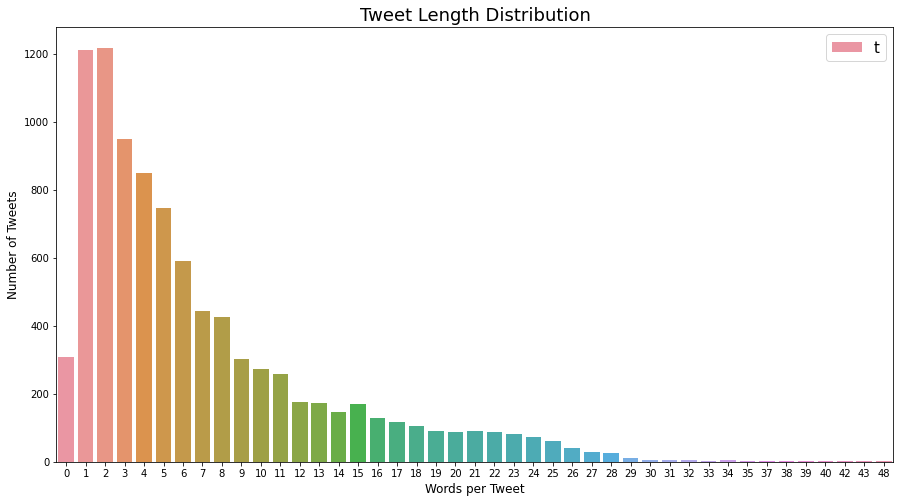

In [55]:
plt.figure(figsize = (15,8))
sns.countplot(sentence_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.legend('tweet length', fontsize = 15)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize =12)
plt.show()

In [56]:
sum(sentence_lengths) / len(sentence_lengths)

6.804621171413219

In [25]:
flat_words = [item for sublist in df['text'] for item in sublist]

In [26]:
word_freq = FreqDist(flat_words)

In [27]:
word_freq

FreqDist({'like': 502, 'people': 348, 'know': 277, 'love': 265, 'time': 265, 'need': 265, 'police': 253, 'would': 237, 'good': 233, 'black': 221, ...})

In [28]:
word_freq.most_common(20)

[('like', 502),
 ('people', 348),
 ('know', 277),
 ('love', 265),
 ('time', 265),
 ('need', 265),
 ('police', 253),
 ('would', 237),
 ('good', 233),
 ('black', 221),
 ('think', 221),
 ('say', 211),
 ('make', 211),
 ('lol', 206),
 ('de', 206),
 ('want', 197),
 ('really', 191),
 ('see', 187),
 ('day', 187),
 ('que', 186)]

In [53]:
word_count = []
for word in flat_words:
    if len(word) < 3:
        word_count.append(word)
print(len(word_count))
print(len(flat_words))

3472
66456


In [52]:
for tweet in df['text']:
    for token in tweet:
        if len(token) < 3:
            tweet.remove(token)
    

0                                                                                                                                            [whatever, take]
1       [как, именно, поход, делает, законным, все, говорят, никто, может, объяснить, логику, при, этом, все, предыдущие, авторы, стали, менее, законными,...
3                                                                                                                [love, spiral, downwards, idyll, stir, star]
4                                                                                             [giving, away, house, vega, resort, reopen, rock, bottom, rate]
5       [thanks, much, good, pretty, lucky, sensed, early, might, cutting, close, able, reschedule, really, exact, wedding, hour, work, health, loved, one...
                                                                                ...                                                                          
9710                                                

In [36]:
freq_df = pd.DataFrame(word_freq, index = [0])

In [37]:
freq_df

,echo,sentiment,sleep,since,30,yesterday,morning,like,full,anxiety,...,#chapter,#sales,sipping,toronto,baseline,insomniac,outdone,casa,papel,fray
0,3,3,172,90,24,44,56,537,55,4933,...,1,1,1,1,1,1,1,1,1,1
